In [2]:
!pip install python-binance

In [3]:
import ssl
import time
import json
import urllib
import hmac, hashlib
import statistics
import requests
import asyncio
import pandas as pd
import concurrent.futures
from urllib.parse import urlparse, urlencode
from urllib.request import Request, urlopen
from datetime import timezone
from collections import Counter
import time
import numpy as np
from threading import Timer
from _thread import start_new_thread
from statistics import mean
import matplotlib.pyplot as plt
from datetime import datetime
from binance.client import Client

import warnings
warnings.filterwarnings('ignore')

In [4]:
class Binance():
    methods = {
            # public methods
            'ping':             {'url':'api/v1/ping', 'method': 'GET', 'private': False},
            'time':             {'url':'api/v1/time', 'method': 'GET', 'private': False},
            'exchangeInfo':     {'url':'api/v1/exchangeInfo', 'method': 'GET', 'private': False},
            'depth':            {'url': 'api/v1/depth', 'method': 'GET', 'private': False},
            'trades':           {'url': 'api/v1/trades', 'method': 'GET', 'private': False},
            'historicalTrades': {'url': 'api/v1/historicalTrades', 'method': 'GET', 'private': False},
            'aggTrades':        {'url': 'api/v1/aggTrades', 'method': 'GET', 'private': False},
            'klines':           {'url': 'api/v1/klines', 'method': 'GET', 'private': False},
            'ticker24hr':       {'url': 'api/v1/ticker/24hr', 'method': 'GET', 'private': False},
            'tickerPrice':      {'url': 'api/v3/ticker/price', 'method': 'GET', 'private': False},
            'tickerBookTicker': {'url': 'api/v3/ticker/bookTicker', 'method': 'GET', 'private': False},
            # private methods
            'createOrder':      {'url': 'api/v3/order', 'method': 'POST', 'private': True},
            'testOrder':        {'url': 'api/v3/order/test', 'method': 'POST', 'private': True},
            'orderInfo':        {'url': 'api/v3/order', 'method': 'GET', 'private': True},
            'cancelOrder':      {'url': 'api/v3/order', 'method': 'DELETE', 'private': True},
            'openOrders':       {'url': 'api/v3/openOrders', 'method': 'GET', 'private': True},
            'allOrders':        {'url': 'api/v3/allOrders', 'method': 'GET', 'private': True},
            'account':          {'url': 'api/v3/account', 'method': 'GET', 'private': True},
            'myTrades':         {'url': 'api/v3/myTrades', 'method': 'GET', 'private': True},
            # wapi
            'depositAddress':   {'url': 'wapi/v3/depositAddress.html', 'method':'GET', 'private':True},
            'withdraw':   {'url': 'wapi/v3/withdraw.html', 'method':'POST', 'private':True},
            'depositHistory': {'url': 'wapi/v3/depositHistory.html', 'method':'GET', 'private':True},
            'withdrawHistory': {'url': 'wapi/v3/withdrawHistory.html', 'method':'GET', 'private':True},
            'assetDetail': {'url': 'wapi/v3/assetDetail.html', 'method':'GET', 'private':True},
            'tradeFee': {'url': 'wapi/v3/tradeFee.html', 'method':'GET', 'private':True},
            'accountStatus': {'url': 'wapi/v3/accountStatus.html', 'method':'GET', 'private':True},
            'systemStatus': {'url': 'wapi/v3/systemStatus.html', 'method':'GET', 'private':True},
            'assetDust': {'url': 'sapi/v1/asset/dust', 'method':'POST', 'private':True},
            'dustLog': {'url': 'wapi/v3/userAssetDribbletLog.html', 'method':'GET', 'private':True},
            'assetAssetDividend': {'url': 'sapi/v1/asset/assetDividend', 'method':'GET', 'private':True},
            #sapi
            'marginTransfer': {'url': 'sapi/v1/margin/transfer', 'method': 'POST', 'private':True},
            'marginLoan': {'url': 'sapi/v1/margin/loan', 'method': 'POST', 'private': True},
            'marginLoanGet': {'url': 'sapi/v1/margin/loan', 'method': 'GET', 'private': True},
            'marginRepay': {'url': 'sapi/v1/margin/repay', 'method': 'POST', 'private': True},
            'marginRepayGet': {'url': 'sapi/v1/margin/repay', 'method': 'GET', 'private': True},
            'marginCreateOrder': {'url': 'sapi/v1/margin/order', 'method': 'POST', 'private':True},
            'marginCancelOrder': {'url': 'sapi/v1/margin/order', 'method': 'DELETE', 'private':True},
            'marginOrderInfo': {'url': 'sapi/v1/margin/order', 'method': 'GET', 'private':True},
            'marginAccount': {'url': 'sapi/v1/margin/account', 'method': 'POST', 'private':True},
            'marginOpenOrders': {'url': 'sapi/v1/margin/openOrders', 'method': 'GET', 'private':True},
            'marginAllOrders': {'url': 'sapi/v1/margin/allOrders', 'method': 'GET', 'private':True},
            'marginAsset': {'url': 'sapi/v1/margin/asset', 'method': 'POST', 'private':True},
            'marginPair': {'url': 'sapi/v1/margin/pair', 'method': 'POST', 'private':True},
            'marginPriceIndex': {'url': 'sapi/v1/margin/priceIndex', 'method': 'POST', 'private':True},
            'marginMyTrades': {'url': 'sapi/v1/margin/myTrades', 'method': 'GET', 'private':True},
            'marginMaxBorrowable': {'url': 'sapi/v1/margin/maxBorrowable', 'method': 'GET', 'private':True},
            'marginmaxTransferable': {'url': 'sapi/v1/margin/maxTransferable', 'method': 'GET', 'private':True},
            #futures
            'futuresExchangeInfo': {'url': 'fapi/v1/exchangeInfo', 'method': 'GET', 'private': False, 'futures': True},
            'futuresKlines': {'url': 'fapi/v1/klines', 'method': 'GET', 'private': False, 'futures': True},
            'futuresCreateOrder':      {'url': 'fapi/v1/order', 'method': 'POST', 'private': True, 'futures': True},
            'futuresAccount':      {'url': 'fapi/v1/account', 'method': 'POST', 'private': True, 'futures': True},
            'futuresBalance':      {'url': 'fapi/v1/balance', 'method': 'GET', 'private': True, 'futures': True},
            'futuresSymbolPriceTicker': {'url': 'fapi/v1/ticker/price', 'method': 'GET', 'private': True, 'futures': True},
            'futuresOrderInfo': {'url': 'fapi/v1/order', 'method': 'GET', 'private': True, 'futures': True},
            'futuresCancelOrder':      {'url': 'fapi/v1/order', 'method': 'DELETE', 'private': True, 'futures': True},
            'futuresPrice':      {'url': 'fapi/v1/ticker/price', 'method': 'GET', 'private': False, 'futures': True},
            'futuresDepth':      {'url': 'fapi/v1/depth', 'method': 'GET', 'private': False, 'futures': True},
            'futuresAllOrders':      {'url': 'fapi/v1/allOrders', 'method': 'GET', 'private': True, 'futures': True},
            'futuresOpenOrders':      {'url': 'fapi/v1/openOrders', 'method': 'GET', 'private': True, 'futures': True},
   }

    def __init__(self, API_KEY, API_SECRET):
        self.API_KEY = API_KEY
        self.API_SECRET = bytearray(API_SECRET, encoding='utf-8')
        self.shift_seconds = 0

    def __getattr__(self, name):
        def wrapper(*args, **kwargs):
            kwargs.update(command=name)
            return self.call_api(**kwargs)
        return wrapper

    def set_shift_seconds(self, seconds):
        self.shift_seconds = seconds

    def call_api(self, **kwargs):

        command = kwargs.pop('command')

        base_url ='https://api.binance.com/'
        if self.methods[command].get('futures'):
            base_url = 'https://fapi.binance.com/'
        api_url = base_url  + self.methods[command]['url']

        payload = kwargs
        headers = {}

        payload_str = urllib.parse.urlencode(payload)
        if self.methods[command]['private']:
            payload.update({'timestamp': int(time.time() + self.shift_seconds - 1) * 1000})
            payload_str = urllib.parse.urlencode(payload).encode('utf-8')
            sign = hmac.new(
                key=self.API_SECRET,
                msg=payload_str,
                digestmod=hashlib.sha256
            ).hexdigest()

            payload_str = payload_str.decode("utf-8") + "&signature="+str(sign)
            headers = {"X-MBX-APIKEY": self.API_KEY, "Content-Type":"application/x-www-form-urlencoded"}

        if self.methods[command]['method'] == 'GET' or self.methods[command]['url'].startswith('sapi'):
            api_url += '?' + payload_str

        response = requests.request(method=self.methods[command]['method'], url=api_url, data="" if self.methods[command]['method'] == 'GET' else payload_str, headers=headers)

        if 'code' in response.text:
            raise Exception(response.text)

        return response.json()

API_KEY = ''
API_SECRET = ''
bot = Binance(
    API_KEY=API_KEY,
    API_SECRET=API_SECRET
)
client=Client(API_KEY, 
              API_SECRET)

In [5]:
def client_create(api_list):
    clients = []
    for api_keys in api_list:
        clients.append(Binance(API_KEY = api_keys['apikey'],API_SECRET = api_keys['apisecret']))
    return clients

_API_LIST_ = [
]

In [6]:
coin_list=[]
pairs = bot.futuresExchangeInfo()
for s in pairs['symbols']:
    if 'USDT' in s['symbol'] and '0' not in s['symbol']:
        coin_list.append(s['symbol'])
print(coin_list)

['BTCUSDT', 'ETHUSDT', 'BCHUSDT', 'XRPUSDT', 'EOSUSDT', 'LTCUSDT', 'TRXUSDT', 'ETCUSDT', 'LINKUSDT', 'XLMUSDT', 'ADAUSDT', 'XMRUSDT', 'DASHUSDT', 'ZECUSDT', 'XTZUSDT', 'BNBUSDT', 'ATOMUSDT', 'ONTUSDT', 'IOTAUSDT', 'BATUSDT', 'VETUSDT', 'NEOUSDT', 'QTUMUSDT', 'IOSTUSDT', 'THETAUSDT', 'ALGOUSDT', 'ZILUSDT', 'KNCUSDT', 'ZRXUSDT', 'COMPUSDT', 'OMGUSDT', 'DOGEUSDT', 'SXPUSDT', 'KAVAUSDT', 'BANDUSDT', 'RLCUSDT', 'WAVESUSDT', 'MKRUSDT', 'SNXUSDT', 'DOTUSDT', 'DEFIUSDT', 'YFIUSDT', 'BALUSDT', 'CRVUSDT', 'TRBUSDT', 'RUNEUSDT', 'SUSHIUSDT', 'SRMUSDT', 'EGLDUSDT', 'SOLUSDT', 'ICXUSDT', 'STORJUSDT', 'BLZUSDT', 'UNIUSDT', 'AVAXUSDT', 'FTMUSDT', 'HNTUSDT', 'ENJUSDT', 'FLMUSDT', 'TOMOUSDT', 'RENUSDT', 'KSMUSDT', 'NEARUSDT', 'AAVEUSDT', 'FILUSDT', 'RSRUSDT', 'LRCUSDT', 'MATICUSDT', 'OCEANUSDT', 'CVCUSDT', 'BELUSDT', 'CTKUSDT', 'AXSUSDT', 'ALPHAUSDT', 'ZENUSDT', 'SKLUSDT', 'GRTUSDT', '1INCHUSDT', 'CHZUSDT', 'SANDUSDT', 'ANKRUSDT', 'BTSUSDT', 'LITUSDT', 'UNFIUSDT', 'REEFUSDT', 'RVNUSDT', 'SFPUSDT', 'XEM

In [7]:
new_coin_list=[]
try:
    for i in coin_list:
        vol = bot.ticker24hr(symbol=i)
        if float(vol['priceChangePercent'])>7 or float(vol['priceChangePercent'])<-7:
            new_coin_list.append(i)
except:
    pass
print(new_coin_list)

['ZECUSDT', 'IOSTUSDT', 'THETAUSDT', 'ZILUSDT', 'ZRXUSDT', 'SXPUSDT', 'BANDUSDT']


In [8]:
_LIMIT_ = 1000
_SYMBOL_ = 'ZECUSDT'
_SECONDS_ = 60
_INTERVAL_ = f"{_SECONDS_//60}m"

In [9]:
def TimeNow():
  now = datetime.now()
  return now.strftime('%Y-%m-%d %H:%M:%S')

def time_stamp_to_normal(inputTime):
  return datetime.utcfromtimestamp(inputTime/1000).strftime('%Y-%m-%d %H:%M:%S')

def wait_time(delta_time):
  a = True
  while a:
    time.sleep(0.1)
    _timenow_ = str(TimeNow()).split(":")
    _timenow_ = _timenow_[len(_timenow_)-1]
    if int(_timenow_)%5 == 0:
      a = False

def TimeStampNow():
  return time.time()

def check(a, b):
  for i in a:
    if b == i:
      return True
  return False
def MinetsTimestamp(minets):
  return minets*60*1000
def TimestampToNormal(inputTime):
  return datetime.utcfromtimestamp(inputTime/1000).strftime('%Y-%m-%d %H:%M:%S')
def NormalToTimestamp(inputTime):
  return int(datetime.strptime(inputTime, '%Y-%m-%d %H:%M:%S').timestamp()*1000)
def klines_parsing(_klines_):
  _klines_final_ = []

  for _i_ in _klines_:
    _klines_final_.append({
    "Open time": TimestampToNormal(_i_[0]+60*60*3*1000),
    "Open": float(_i_[1]),
    "High": float(_i_[2]),
    "Low": float(_i_[3]),
    "Close": float(_i_[4]),
    "Volume": float(_i_[5]),
    "Close time": TimestampToNormal(_i_[6]+60*60*3*1000),
    "Quote asset volume": _i_[7],
    "Number of trades": _i_[8],
    "Taker buy base asset volume": _i_[9],
    "Taker buy quote asset volume": _i_[10],
    "Ignore": _i_[11]
    })
  return _klines_final_

TimestampNow = NormalToTimestamp(TimeNow())
close = []
close_max = []
close_min = []
for i in range(1, 37):
  _MINETS_ = 240
  _INTERVAL_ = "5m"

  _klines_ = bot.klines(
                symbol=_SYMBOL_,
                limit=_MINETS_,
                interval=_INTERVAL_,
                startTime=TimestampNow - MinetsTimestamp(_MINETS_*i),
                endTime=TimestampNow - MinetsTimestamp(_MINETS_*(i-1)),
  )
  _klines_ = klines_parsing(_klines_)
  _klines_ = pd.DataFrame(_klines_)
  for i in _klines_['Close']:
    close.append(i)
  close_max.append(max(close))
  close_min.append(min(close))
  close.clear()

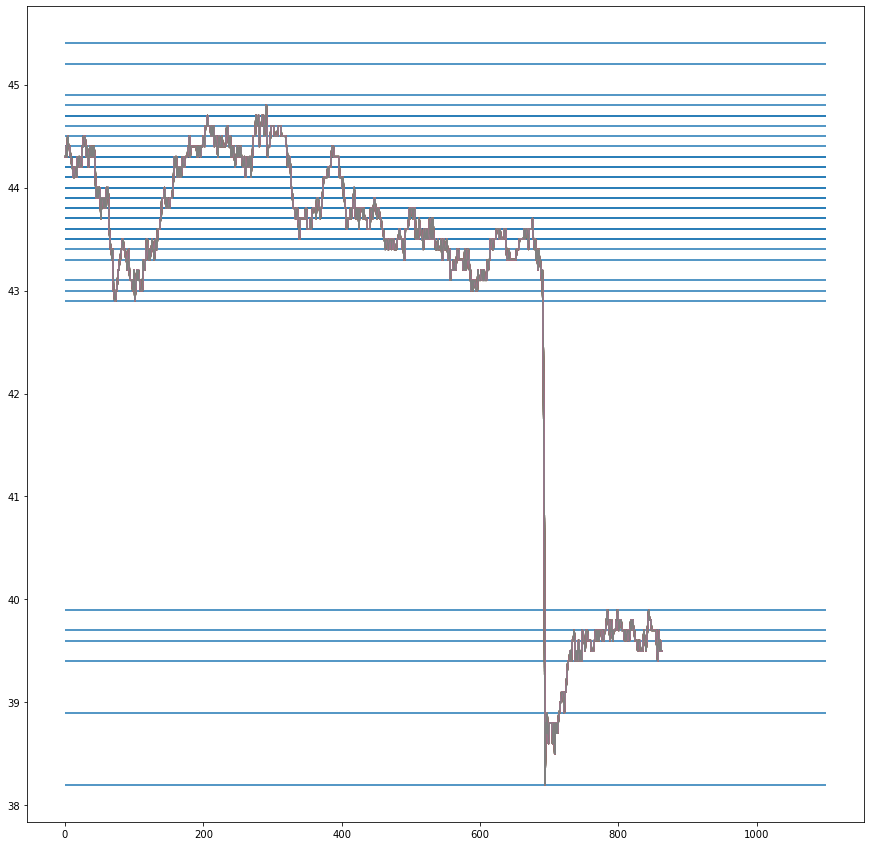

In [10]:
_klines_all_ = bot.klines(
                symbol=_SYMBOL_,
                limit=1440*3,
                interval=_INTERVAL_,
                startTime=TimestampNow - MinetsTimestamp(1440*3),
                endTime=TimestampNow,
  )
_klines_all_ = klines_parsing(_klines_all_)
_klines_all_ = pd.DataFrame(_klines_all_)
plt.figure(figsize=(15, 15))
for i in set(close_max):
  x = _klines_all_['Close']
  plt.hlines(y=i, xmin=0, xmax=1100)
  plt.plot(x)
for i in set(close_min):
  x = _klines_all_['Close']
  plt.hlines(y=i, xmin=0, xmax=1100)
  plt.plot(x)
plt.show()


In [11]:
close_max_min = close_max+close_min
counter_max_min = Counter(close_max_min)
close_max_min_copy=close_max_min.copy()
print(counter_max_min)
print(close_max_min)

Counter({44.2: 7, 44.7: 6, 43.9: 5, 43.7: 4, 43.5: 4, 43.8: 4, 44.3: 4, 45.2: 4, 43.6: 3, 44.8: 3, 44.5: 3, 44.1: 3, 39.9: 2, 44.4: 2, 44.0: 2, 44.6: 2, 43.3: 2, 42.9: 2, 39.7: 1, 44.9: 1, 45.4: 1, 39.4: 1, 39.6: 1, 38.9: 1, 38.2: 1, 43.0: 1, 43.1: 1, 43.4: 1})
[39.9, 39.9, 39.7, 43.7, 43.6, 43.5, 43.7, 43.8, 43.9, 44.4, 44.2, 44.8, 44.7, 44.7, 44.5, 43.9, 44.0, 44.5, 44.6, 44.1, 44.3, 44.3, 44.2, 44.9, 45.2, 44.4, 44.7, 45.2, 45.4, 45.2, 44.5, 44.6, 44.8, 44.8, 44.7, 45.2, 39.4, 39.6, 38.9, 38.2, 43.3, 43.0, 43.1, 43.3, 43.4, 43.6, 43.5, 43.7, 44.1, 44.3, 43.8, 42.9, 42.9, 43.9, 43.8, 43.6, 43.9, 43.8, 43.7, 43.5, 44.0, 43.9, 44.2, 44.7, 44.7, 44.2, 44.1, 44.2, 44.3, 44.2, 43.5, 44.2]


In [76]:
bot.account()['balances']

[{'asset': 'BTC', 'free': '0.00431592', 'locked': '0.00000000'},
 {'asset': 'LTC', 'free': '0.09439400', 'locked': '0.00000000'},
 {'asset': 'ETH', 'free': '1.09201145', 'locked': '0.00000000'},
 {'asset': 'NEO', 'free': '0.00000000', 'locked': '0.00000000'},
 {'asset': 'BNB', 'free': '0.00000000', 'locked': '0.00000000'},
 {'asset': 'QTUM', 'free': '0.00000000', 'locked': '0.00000000'},
 {'asset': 'EOS', 'free': '0.00000000', 'locked': '0.00000000'},
 {'asset': 'SNT', 'free': '0.00000000', 'locked': '0.00000000'},
 {'asset': 'BNT', 'free': '0.00000000', 'locked': '0.00000000'},
 {'asset': 'GAS', 'free': '0.00000000', 'locked': '0.00000000'},
 {'asset': 'BCC', 'free': '0.00000000', 'locked': '0.00000000'},
 {'asset': 'USDT', 'free': '17.97056014', 'locked': '0.00000000'},
 {'asset': 'HSR', 'free': '0.00000000', 'locked': '0.00000000'},
 {'asset': 'OAX', 'free': '0.00000000', 'locked': '0.00000000'},
 {'asset': 'DNT', 'free': '0.00000000', 'locked': '0.00000000'},
 {'asset': 'MCO', 'fre

In [122]:
lots_round = 3
commission = 0.001
start_sum = round(float(bot.account()['balances'][11]['free']), 4)
spot_last_price = float(bot.tickerPrice(symbol = _SYMBOL_)['price'])
new_start_sum = start_sum * 0.96 + start_sum * commission * 2
lots = round(new_start_sum / float(spot_last_price), lots_round)
lots

0.435

In [103]:
bot.createOrder(symbol=_SYMBOL_, type='MARKET', quantity=0.4004, side='BUY', newClientOrderId="sell_bids")
# bot.createOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=0.4, stopPrice=round(nearest_close_min+tick_size, price_precision), price=round(nearest_close_min*(1+stop_loss), price_precision), side='SELL', newClientOrderId="stop_loss")
# bot.createOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=0.4, stopPrice=round(nearest_close_min-tick_size, price_precision), price=round(nearest_close_min*(1-take_profit), price_precision), side='SELL', newClientOrderId="take_profit")  

Exception: {"code":-1013,"msg":"Filter failure: LOT_SIZE"}

In [ ]:
def find_dict(value, seq, where):
    for index, item in enumerate(seq):
        if item[where]==value:
            return(index)
            break

def find_list(value, seq):
    for index, item in enumerate(seq):
        if value in item: 
            return index, item
            
i=0
profit=0
start_sum=float(bot.account()['balances'][11]['free'])
# start_sum=float(start_sum)/4*0,997
number_in_info=find_dict(_SYMBOL_,quantity_precision,'symbol')
number_in_account=find_dict('ZEC', bot.account()['balances'], 'asset')
quantity_precision=BOT_LIST[bot_number].exchangeInfo()['symbols'][number_in_info]['quotePrecision']
price_precision=BOT_LIST[bot_number].exchangeInfo()['symbols'][number_in_info]['quotePrecision']
gap=2
lots_round=3
tick_size=float(BOT_LIST[bot_number].exchangeInfo()['symbols'][number_in_info]['filters'][0]['tickSize'])*gap
how_more_mean_vol=3
stop_loss=0.001
take_profit=0.002
right_answer=0
false_answer=0
bot_number=0
commission=0.001
close_max_copy=close_max.copy()
close_min_copy=close_min.copy()
BOT_LIST = client_create(_API_LIST_)

while True:
    try:
        if TimeNow()[17:19] == '20':
            before_price = klines_parsing(BOT_LIST[bot_number].klines(symbol=_SYMBOL_, interval='1m', ))[-2]['Close']
        
        if TimeNow()[11:] == '00:00:01':
            list(nearest_close_max).clear()
            list(nearest_close_min).clear()
            close = []
            close_max = []
            close_min = []
            for i in range(1, 37):
                _MINETS_ = 240
                _INTERVAL_ = "5m"

                _klines_ = BOT_LIST[bot_number].klines(
                        symbol=_SYMBOL_,
                        limit=_MINETS_,
                        interval=_INTERVAL_,
                        startTime=TimestampNow - MinetsTimestamp(_MINETS_*i),
                        endTime=TimestampNow - MinetsTimestamp(_MINETS_*(i-1)),
                )
                _klines_ = klines_parsing(_klines_)
                _klines_ = pd.DataFrame(_klines_)
                for i in _klines_['Close']:
                    close.append(i)
                close_max.append(max(close))
                close_min.append(min(close))
                close.clear()
            close_max_copy=close_max.copy()
            close_min_copy=close_min.copy()
            close_max_min = close_max+close_min
            close_max_min_copy=close_max_min.copy()
            counter_max_min = Counter(close_max_min)
        
        i+=1
        if bot_number == 12:
            bot_number = 0
        bot_number+=1
        bids=[]
        asks=[]
        glass = BOT_LIST[bot_number].depth(symbol=_SYMBOL_)
        spot_last_price = float(bot.tickerPrice(symbol=_SYMBOL_)['price'])
        symbol_balace=float(bot.account()['balances'][number_in_account]['free'])
        bids_list_vol=[]

        for j in glass['bids']:
            bids_list_vol.append(j[1])
        bids_list_vol = np.array(bids_list_vol).astype(np.float)
        a = np.mean(bids_list_vol)*how_more_mean_vol
        for u in glass['bids']:
            if float(u[1])>a and float(u[1]) not in close_min_copy and float(u[1]) not in close_max_copy:
                bids.append(u[0])
        for f in glass['asks']:
            if float(f[1])>a and float(f[1]) not in close_max_copy and float(f[1]) not in close_min_copy:
                asks.append(f[0])

        spot_last_price = float(bot.tickerPrice(symbol=_SYMBOL_)['price'])
        bids = np.array(bids).astype(np.float)
        asks = np.array(asks).astype(np.float)
        nearest_bids = min(set(bids), key=lambda x:abs(x-float(spot_last_price)))
        nearest_asks = min(set(asks), key=lambda x:abs(x-float(spot_last_price)))
        nearest_close_max_min = min(close_max_min_copy, key=lambda x:abs(x-float(spot_last_price)))
        spot_last_price = float(bot.tickerPrice(symbol=_SYMBOL_)['price'])
        lots=round(start_sum/float(spot_last_price), lots_round)

        print('Ближайший bids', nearest_bids)
        if symbol_balace<lots:
            try:
                bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='take_profit')
            except Exception:
                pass
            try:
                bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='stop_loss')
            except Exception:
                pass
            

        if spot_last_price == nearest_close_max_min-0.1 and nearest_close_max_min in list(bids) and counter_max_min[nearest_close_max]>=2 and symbol_balace=<lots and before_price<spot_last_price:
            print('Пробой asks')
            using_nearest_close_max_min = nearest_close_max_min
            bot.createOrder(symbol=_SYMBOL_, type='MARKET', quantity=round(lots*0.96, quantity_precision), side='BUY', newClientOrderId="buy_asks")
            bot.createOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), stopPrice=round(nearest_close_max-tick_size, price_precision), price=round(nearest_close_max*(1-stop_loss), price_precision), side='SELL', newClientOrderId="stop_loss")
            bot.createOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), stopPrice=round(nearest_close_max+tick_size, price_precision), price=round(nearest_close_max*(1+take_profit), price_precision), side='SELL', newClientOrderId="take_profit")         
#             close_min_copy.append(nearest_close_max)
#             close_max_copy = [x for x in close_max_copy if x != nearest_close_max]
        
#         elif spot_last_price == nearest_close_max_min and nearest_close_max_min in list(asks) and counter_max_min[nearest_close_min]>=2 and symbol_balace=<lots and before_price<spot_last_price:   
#             using_nearest_close_max_min = nearest_close_max_min
#             print('Пробой bids')
#             bot.createOrder(symbol=_SYMBOL_, type='MARKET', quantity=round(lots*0.96, quantity_precision), side='SELL', newClientOrderId="sell_bids")
#             bot.createOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), stopPrice=round(nearest_close_min+tick_size, price_precision), price=round(nearest_close_min*(1+stop_loss), price_precision), side='SELL', newClientOrderId="stop_loss")
#             bot.createOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), stopPrice=round(nearest_close_min-tick_size, price_precision), price=round(nearest_close_min*(1-take_profit), price_precision), side='SELL', newClientOrderId="take_profit")    
# #             close_max_copy.append(nearest_close_min)
# #             close_min_copy = [x for x in close_min_copy if x != nearest_close_min]        
        
        elif spot_last_price == nearest_bids-0.1 and symbol_balace=<lots:
            using_nearest_bids = nearest_bids
            print('Отскок bids')
            bot.createOrder(symbol=_SYMBOL_, type='MARKET', quantity=round(lots*0.96, quantity_precision), side='BUY', newClientOrderId="buy_bids")
            bot.createOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), price=round(nearest_bids*(1-stop_loss), price_precision), side='SELL', stopPrice=round(nearest_bids-tick_size, price_precision), newClientOrderId="stop_loss")
            bot.createOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), price=round(nearest_bids*(1+take_profit), price_precision), side='SELL', stopPrice=round(nearest_bids+tick_size, price_precision), newClientOrderId="take_profit")            
            set(bids).remove(nearest_bids)
        
#         elif spot_last_price == nearest_asks and symbol_balace=<lots:
#             using_nearest_asks = nearest_asks
#             print('Отскок asks')
#             bot.createOrder(symbol=_SYMBOL_, type='MARKET', quantity=round(lots*0.96, quantity_precision), side='SELL', newClientOrderId="sell_asks")
#             bot.createOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), price=round(nearest_asks*(1+stop_loss), price_precision), side='BUY', stopPrice=round(nearest_asks+tick_size, price_precision), newClientOrderId="stop_loss")
#             bot.createOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), price=round(nearest_asks*(1-take_profit), price_precision), side='BUY', stopPrice=round(nearest_asks-tick_size, price_precision), newClientOrderId="take_profit")            
#             set(asks).remove(nearest_asks)
        
        if symbol_balace>=lots and len(bot.futuresOpenOrders())!=2:
            if len(bot.futuresOpenOrders()): #1
                if 'stop_loss' in bot.futuresOpenOrders()[0]['clientOrderId']:
                    if bot.futuresAllOrders()[-2]['clientOrderId'] == 'buy_asks':
                        bot.createOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), stopPrice=round(using_nearest_close_max_min+tick_size, price_precision), price=round(using_nearest_close_max_min*(1+take_profit), price_precision), side='SELL', newClientOrderId="take_profit")
#                         close_min_copy.append(using_nearest_close_max)
#                         close_max_copy = [x for x in close_max_copy if x != using_nearest_close_max]
#                     elif bot.futuresAllOrders()[-2]['clientOrderId'] == 'sell_bids':
#                         bot.createOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), stopPrice=round(using_nearest_close_max_min-tick_size, price_precision), price=round(using_nearest_close_max_min*(1-take_profit), price_precision), side='SELL', newClientOrderId="take_profit")
# #                         close_max_copy.append(using_nearest_close_min)
# #                         close_min_copy = [x for x in close_min_copy if x != using_nearest_close_min]
                    elif bot.futuresAllOrders()[-2]['clientOrderId'] == 'buy_bids':
                        bot.createOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), price=round(using_nearest_bids*(1+take_profit), price_precision), side='SELL', stopPrice=round(using_nearest_bids+tick_size, price_precision), newClientOrderId="take_profit")
                        set(bids).remove(using_nearest_bids)
#                     elif bot.futuresAllOrders()[-2]['clientOrderId'] == 'sell_asks':    
#                         bot.createOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), price=round(using_nearest_asks*(1-take_profit), price_precision), side='BUY', stopPrice=round(using_nearest_close_asks-tick_size, price_precision), newClientOrderId="take_profit")
#                         set(asks).remove(using_nearest_asks)

                elif 'take_profit' in bot.futuresOpenOrders()[0]['clientOrderId']:
                    if bot.futuresAllOrders()[-2]['clientOrderId'] == 'buy_asks':
                        bot.createOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), stopPrice=round(using_nearest_close_max_min-tick_size, price_precision), price=round(using_nearest_close_max_min*(1-stop_loss), price_precision), side='SELL', newClientOrderId="stop_loss")
#                         close_min_copy.append(using_nearest_close_max)
#                         close_max_copy = [x for x in close_max_copy if x != using_nearest_close_max]
#                     elif bot.futuresAllOrders()[-2]['clientOrderId'] == 'sell_bids':
#                         bot.createOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), stopPrice=round(using_nearest_close_max_min+tick_size, price_precision), price=round(using_nearest_close_max_min*(1+stop_loss), price_precision), side='SELL', newClientOrderId="stop_loss")
# #                         close_max_copy.append(using_nearest_close_min)
# #                         close_min_copy = [x for x in close_min_copy if x != using_nearest_close_min]                    
                    elif bot.futuresAllOrders()[-2]['clientOrderId'] == 'buy_bids':
                        bot.createOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), price=round(using_nearest_bids*(1-stop_loss), price_precision), side='SELL', stopPrice=round(using_nearest_bids-tick_size, price_precision), newClientOrderId="stop_loss")
                        set(bids).remove(using_nearest_bids)
#                     elif bot.futuresAllOrders()[-2]['clientOrderId'] == 'sell_asks':    
#                         bot.createOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), price=round(using_nearest_asks*(1+stop_loss), price_precision), side='BUY', stopPrice=round(using_nearest_asks+tick_size, price_precision), newClientOrderId="stop_loss")
#                         set(asks).remove(using_nearest_asks)

            else: #2
                if bot.futuresAllOrders()[-1]['clientOrderId'] == 'buy_asks':
                    bot.createOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), stopPrice=round(using_nearest_close_max_min-tick_size, price_precision), price=round(using_nearest_close_max_min*(1-stop_loss), price_precision), side='SELL', newClientOrderId="stop_loss")
                    bot.createOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), stopPrice=round(using_nearest_close_max_min+tick_size, price_precision), price=round(using_nearest_close_max_min*(1+take_profit), price_precision), side='SELL', newClientOrderId="take_profit")
#                     close_min_copy.append(using_nearest_close_max)
#                     close_max_copy = [x for x in close_max_copy if x != using_nearest_close_max]    
#                 elif bot.futuresAllOrders()[-1]['clientOrderId'] == 'sell_bids':
#                     bot.createOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), stopPrice=round(using_nearest_close_max_min+tick_size, price_precision), price=round(using_nearest_close_max_min*(1+stop_loss), price_precision), side='SELL', newClientOrderId="stop_loss")
#                     bot.createOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), stopPrice=round(using_nearest_close_max_min-tick_size, price_precision), price=round(using_nearest_close_max_min*(1-take_profit), price_precision), side='SELL', newClientOrderId="take_profit")
#                     close_max_copy.append(using_nearest_close_min)
#                     close_min_copy = [x for x in close_min_copy if x != using_nearest_close_min]                
                elif bot.futuresAllOrders()[-1]['clientOrderId'] == 'buy_bids':
                    bot.createOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), price=round(using_nearest_bids*(1-stop_loss), price_precision), side='SELL', stopPrice=round(using_nearest_bids-tick_size, price_precision), newClientOrderId="stop_loss")
                    bot.createOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), price=round(using_nearest_close_bids*(1+take_profit), price_precision), side='SELL', stopPrice=round(using_nearest_close_bids+tick_size, price_precision), newClientOrderId="take_profit")            
                    set(bids).remove(using_nearest_bids)
#                 elif bot.futuresAllOrders()[-1]['clientOrderId'] == 'sell_asks':    
#                     bot.createOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), price=round(using_nearest_asks*(1+stop_loss), price_precision), side='BUY', stopPrice=round(using_nearest_asks+tick_size, price_precision), newClientOrderId="stop_loss")
#                     bot.createOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), price=round(using_nearest_close_asks*(1-take_profit), price_precision), side='BUY', stopPrice=round(using_nearest_close_asks-tick_size, price_precision), newClientOrderId="take_profit")
#                     set(asks).remove(using_nearest_asks)
        
        print('Ближайший asks', nearest_asks)
        print('Ориентировочный объем', round(a, 2))

            
# отскок asks - sell_asks, отскок bids - buy_bids, пробой bids - sell_bids, пробой asks - buy_asks

        if i%40==0:
            list(bids).clear()
            list(asks).clear()
               
        
    except Exception as err:
        print('Ошибка:', err)

In [104]:
df = pd.read_csv('scalping_bot_version8.csv')
df

,Монета,Тип операции,bids or asks,Цена входа,Время входа,Цена выхода,Время выхода,Правильный Неправильный
0,ZECUSDT,пробой,bids,42.9,2023-02-14 07:15:53,43.0,2023-02-14 07:16:52,False
1,ZECUSDT,отскок,asks,43.0,2023-02-14 07:16:57,42.9,2023-02-14 07:21:40,True
2,ZECUSDT,отскок,bids,42.9,2023-02-14 07:21:45,43.0,2023-02-14 07:22:12,True
3,ZECUSDT,отскок,bids,42.9,2023-02-14 07:22:35,43.0,2023-02-14 07:22:45,True
4,ZECUSDT,отскок,asks,43.1,2023-02-14 07:25:03,43.2,2023-02-14 07:29:44,False
...,...,...,...,...,...,...,...,...
1451,ZECUSDT,отскок,bids,44.1,2023-02-15 21:43:27,44.2,2023-02-15 21:44:15,True
1452,ZECUSDT,отскок,asks,44.2,2023-02-15 21:44:15,44.1,2023-02-15 21:44:26,True
1453,ZECUSDT,отскок,bids,44.1,2023-02-15 21:44:29,44.2,2023-02-15 21:44:49,True
1454,ZECUSDT,отскок,asks,44.2,2023-02-15 21:44:50,44.1,2023-02-15 21:45:52,True


In [114]:
df.loc[(df['Тип операции']=='пробой') & (df['bids or asks']=='asks') | (df['Тип операции']=='отскок') & (df['bids or asks']=='bids')].count()

Монета                     717
Тип операции               717
bids or asks               717
Цена входа                 717
Время входа                717
Цена выхода                717
Время выхода               717
Правильный Неправильный    717
dtype: int64